# Distribute and allocate tokens to bidders based on a first come first served basis with a condition: everyone gets something

In [1]:
from collections import Counter
from rebalancing_scaleback import results_chart
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

Create a random Loan amount

In [2]:
loan_amount = round(random.uniform(10,20),0) * 1000
loan_tokens = int(loan_amount/1000)
print('Total Amount to Distribute = ' + str(loan_amount))

Total Amount to Distribute = 11000.0


In [3]:
customers = ['Customer A', 'Customer B', 'Customer C', 'Customer D']

Create a function to create random bids that do not exceed the loan amount based on the amount of customers

In [4]:
def random_bid_generator(loan_amount, customers):

    bids = len(customers)
    bid_registry = []
    max_bid = loan_amount / 1000

    for i in range(bids):
        bid_amnt = round(random.uniform(1,max_bid),0) * 1000
        bid_registry.append(bid_amnt)
        i+=1
        
    return bid_registry

The code below will generate random bids with Customer B has requesting the min of 1000.

In [5]:
bid_registry = random_bid_generator(loan_amount, customers)
bid_reg = bid_registry.copy()
bid_reg[1] = 1000.00
original_bid = bid_reg.copy()

Create a Loop to allocate the tokens in a Queue based on first come first served

In [6]:
q = []
token_count = 0

for i in range(loan_tokens):
    
    if token_count == loan_tokens:
            break
       
    for z,x in enumerate(bid_reg):
                        
        if token_count == loan_tokens:
            break
            
        if x == 0:
            continue

        tokens = int(x / 1000)
        q.append(customers[z])
        
        remaining_token = x - 1000
        bid_reg[z] = remaining_token
                
        token_count = len(q)

Count the Number of items in the Queue to calculate the tokens each customer has been allocated 

In [7]:
df = pd.DataFrame(q, columns= ['Customer'])
scaleback = df['Customer'].value_counts() * 1000
scaleback = dict(sorted(scaleback.items()))
scaleback = list(scaleback.values())

Create a Dictionary to Visualise Scalebacks and how it affects each Customer

In [8]:
# Creating an empty dictionary 
results = {} 
  
# Adding list as value 
results['Original Bid'] = original_bid
results['Allocation'] = scaleback

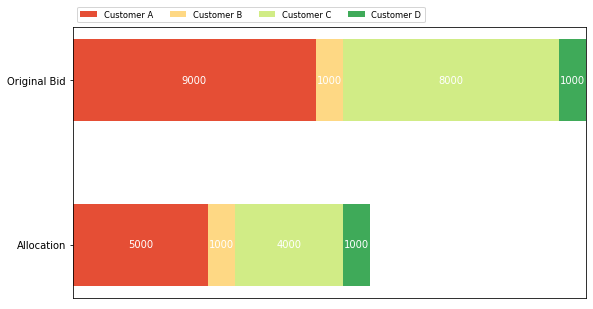

In [9]:
results_chart(results,customers)
plt.show()